## Twitter API authentication

In [1]:
import tweepy

In [2]:
api_key =  'M4byuHg0FTUo8mv2cx9eBFIPY'
api_secret_key = 'bXvWUOQjAQj5M6pZsm0pU3wVWMJoSyv4Ynspwh5MS2mh8KMmIk'
access_token =  '1445085675951427584-pEPtwXXkfXFRIeiNJYpuGjy08QiBNP'
access_token_secret =   'KJXijOatOdwkZX9opNeYaAGZY4Qi1yZYQn4UIEu1oS5ru'

## authorize the API Key

In [3]:
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

## authorization to user's access token and access token secret

In [4]:
authentication.set_access_token(access_token, access_token_secret)

## call the api

In [5]:
api = tweepy.API(authentication)

## Streaming tweets from home timeline

In [6]:
public_tweet = api.home_timeline(count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> RT @UNESCO: Bullying has serious impacts on children’s mental health, and can  lead to depression &amp; suicidal thoughts.
 
This #MentalHealth…
--> The war in Ukraine is inflicting immense human suffering &amp; devastating communities. 

@UNDP is supporting vital ele… https://t.co/EKcKDhx9jF
--> RT @UNFPA: Every 2 hours, a woman in #Afghanistan dies during pregnancy and childbirth. 

“We need to expand services for women and girls,”…
--> RT @UN_Women: Thank you to all the teachers who work hard continuously to ensure equal education in their classrooms, especially during the…
--> Deployment of 53 Starlink satellites confirmed


## Streaming tweets from user timeline

In [7]:
user = "F1"
public_tweet = api.user_timeline(id=user,count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> Alex and Charles discuss all the essential topics ahead of Miami... including Bear Grylls! 😆

#MiamiGP #F1… https://t.co/kYMvARzSXm
--> We could listen to these two all day! 😂

#MiamiGP #F1 @LandoNorris @GeorgeRussell63 https://t.co/OsyGpU7Hl9
--> Get in and stock up on your Miami merch! 🤩

#MiamiGP #F1
--> The Miami International Autodrome 🤩

Onboard the @mercedesamg Safety Car 🙌

#MiamiGP #F1 https://t.co/dVYQxErgkq
--> The stage is set for a massive weekend ahead in Miami 👊

https://t.co/JGsCJV3kN0

#MiamiGP #F1


## Streaming Tweets on Keywords

In [8]:
# Retrieve tweets
result = api.search(['formulaOne','F1','Formula 1'], lang='en', count=10)
# JSON keys
print(result[0]._json.keys())
# Access the Tweet JSON
print(result[0].user._json)
# Access hashtags from code
print(result[4].entities['hashtags'])

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])
{'id': 213281391, 'id_str': '213281391', 'name': 'Knup', 'screen_name': 'RyanKnuppel', 'location': 'Orlando, FL', 'description': 'Owner of Knup Solutions sports content agency, Founder Sports 2.0 Network, sports business and betting advocate!', 'url': 'https://t.co/DbuwJtLecM', 'entities': {'url': {'urls': [{'url': 'https://t.co/DbuwJtLecM', 'expanded_url': 'https://www.knupsolutions.com', 'display_url': 'knupsolutions.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1477, 'friends_count': 1775, 'listed_count': 37, 'created_at': 'Mon Nov 08 13:57:19 +0000 2010', 'favourites

## Streaming Tweets in Real-Time using StreamListener

In [9]:
import time
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self,time_limit=300):
        self.start_time = time.time()
        self.limit = time_limit
        super(MyStreamListener,self).__init__()
    
    def on_connect(self):
        print("Connected to Twitter API.")
        
    def on_status(self, status):
        
        
        # Tweet ID
        tweet_id = status.id
        
   
        
        
        # Tweet
        if status.truncated == True:
            tweet = status.extended_tweet['full_text']
            hashtags = status.extended_tweet['entities']['hashtags']
        else:
            tweet = status.text
            hashtags = status.entities['hashtags']
        
        # Read hastags
        hashtags = read_hashtags(hashtags)          
        
        # Retweet count
        retweet_count = status.retweet_count
        # Language
        lang = status.lang
        
        
        # If tweet is not a retweet and tweet is in English
        if not hasattr(status, "retweeted_status") and lang=="en":
            # Connect to database
            dbConnect( tweet_id, tweet, retweet_count, hashtags)
            
        if (time.time() - self.start_time) > self.limit:
            
            print(time.time(), self.start_time, self.limit)
            return False
            
    def on_error(self, status_code):
        if status_code == 420:
            # Returning False in on_data disconnects the stream
            return False

## Extract hashtags

In [10]:
def read_hashtags(tag_list):
    hashtags = []
    for tag in tag_list:
        hashtags.append(tag['text'])
    return hashtags

## Creating Tables in PostgreSQL

In [11]:
commands = (
            # Table 1
            '''Create Table TweetDim(Tweet_Id BIGINT PRIMARY KEY,
                                         Tweet TEXT,
                                         Retweet_Count INT
                                         );''',
            # Table 2
            '''Create Table HashtagDim(Id SERIAL PRIMARY KEY,
                                         Tweet_Id BIGINT,
                                         Hashtag TEXT,
                                         CONSTRAINT fk_tweet
                                             FOREIGN KEY(Tweet_Id)
                                                 REFERENCES TweetDim(Tweet_Id));''')

In [12]:
import psycopg2

# Connection to database server
conn = psycopg2.connect(host="localhost",database="FormulaOne",port=5432,user='postgres',password='root')

In [13]:
# # Create cursor to execute SQL commands
# cur = conn.cursor()

# # Execute SQL commands
# for command in commands:
#     # Create tables
#     cur.execute(command)

# # Close communication with server
# conn.commit()
# cur.close()
# conn.close()

## Connecting to the Database

In [14]:
# Insert Tweet data into database
def dbConnect( tweet_id, tweet, retweet_count, hashtags):
    
    conn = psycopg2.connect(host="localhost",database="FormulaOne",port=5432,user='postgres',password='root')
    
    cur = conn.cursor()

    # insert tweet information
    command = '''INSERT INTO TweetDim (tweet_id, tweet, retweet_count) VALUES (%s,%s,%s);'''
    cur.execute(command,(tweet_id,  tweet, retweet_count))
    
    # insert entity information
    for i in range(len(hashtags)):
        hashtag = hashtags[i]
        command = '''INSERT INTO HashtagDim (tweet_id, hashtag) VALUES (%s,%s);'''
        cur.execute(command,(tweet_id, hashtag))
    
    # Commit changes
    conn.commit()
    
    # Disconnect
    cur.close()
    conn.close()

## Streaming Tweets into Database

In [15]:
# Streaming tweets

myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth=api.auth, listener=myStreamListener,
                        tweet_mode="extended")
myStream.filter(track=['formulaOne','F1','Formula 1'])

Connected to Twitter API.
1651849731.5068316 1651849431.4367406 300


## Analysing streamed tweets


In [16]:
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##  Cleaning the tweets


In [17]:
def preprocess(tweet):
    
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # remove mentions
    tweet = re.sub("@\w+","",tweet)
    # alphanumeric and hashtags
    tweet = re.sub("[^a-zA-Z#]"," ",tweet)
    # remove multiple spaces
    tweet = re.sub("\s+"," ",tweet)
    tweet = tweet.lower()
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sent = ' '.join([lemmatizer.lemmatize(w) for w in tweet.split() if len(lemmatizer.lemmatize(w))>3])

    return sent

## Connecting to the Database


In [18]:
def DbConnect(query):
    
    conn = psycopg2.connect(host="localhost",database="FormulaOne",port=5432,user='postgres',password='root')
    curr = conn.cursor()
    
    curr.execute(query)
    
    rows = curr.fetchall()
    
    return rows

In [19]:
data_tweet = DbConnect("SELECT  Tweet_Id, Tweet FROM TweetDim;")

df_tweet = pd.DataFrame(columns=['Tweet_Id','Clean_Tweet'])

for data in data_tweet:
    index = len(df_tweet)
    df_tweet.loc[index,'Tweet_Id'] = data[0]
    df_tweet.loc[index,'Clean_Tweet'] = preprocess(data[1])
    
df_tweet.head()

,Tweet_Id,Clean_Tweet
0,1512705706205622272,leclerc australian pole with verstappen second...
1,1512705709443624965,when team doing well
2,1512705720088928259,melbourne well truly grip fever after three re...
3,1512705727692951552,hero remembered legend never
4,1512705728284348425,they thinking


In [20]:
df_tweet.to_csv (r'Clean_Tweet.csv', index = False, header=True)

### Most commomly occuring words

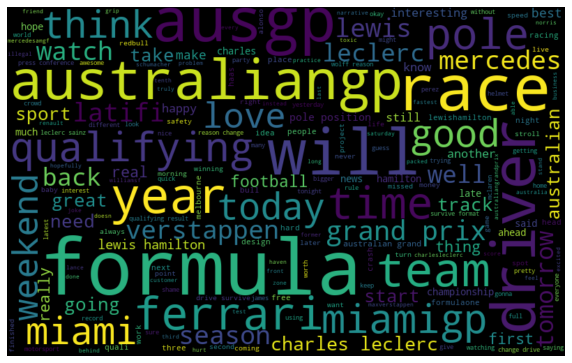

In [21]:
def keywords():
    all_words = ' '.join([text for text in df_tweet['Clean_Tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

keywords()

## Sentiment analysis using Textblob

In [22]:
def sentiment(tweet):

    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
df_tweet['Sentiment'] = df_tweet['Clean_Tweet'].apply(sentiment)

df_tweet.head(20)

,Tweet_Id,Clean_Tweet,Sentiment
0,1512705706205622272,leclerc australian pole with verstappen second...,0
1,1512705709443624965,when team doing well,0
2,1512705720088928259,melbourne well truly grip fever after three re...,1
3,1512705727692951552,hero remembered legend never,0
4,1512705728284348425,they thinking,0
5,1512705735704076291,this last helmet will using with game horizon ...,1
6,1512705757741043714,okay biggest some allegation lewis fanbase mak...,1
7,1512705758294650881,hurt alonso,0
8,1512705764393205768,give best team some support lose together grea...,1
9,1512705766247084035,turn #lewishamilton isnt that great always bee...,1


## Querying hashtags from database

In [23]:
data_tags = DbConnect("SELECT Tweet_Id, Hashtag FROM HashtagDim;")

df_tags = pd.DataFrame(columns=['Tweet_Id','Hashtags'])

for data in data_tags:
    index = len(df_tags)
    df_tags.loc[index,'Tweet_Id'] = data[0]
    df_tags.loc[index,'Hashtags'] = data[1]
    
df_tags.head(20)

,Tweet_Id,Hashtags
0,1512705720088928259,7NEWS
1,1512705764393205768,StickingwithMercedesAMGF1
2,1512705766247084035,F1
3,1512705766247084035,LewisHamilton𓃵
4,1512705773477924871,FormulaOne
5,1512705773477924871,AusGP
6,1512705773477924871,AustralianGP
7,1512705780344311810,F1
8,1512705780344311810,ForzaFerrari
9,1512705780344311810,Leclerc


In [24]:
df_tags.to_csv (r'Hashtags.csv', index = False, header=True)

## Unique hashtag counts

In [25]:
table = df_tags.pivot_table(index="Hashtags",values='Tweet_Id',aggfunc=len)

# Convert pivot table to dataframe
df_pivot = pd.DataFrame(table.to_records())

df_pivot.head()

,Hashtags,Tweet_Id
0,7NEWS,2
1,ABM,1
2,AFC,1
3,AlfaRomeo,1
4,AlphaTauri,1


## Plotting hashtags counts

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 78069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 78069 missing from current font.
  font.set_text(s, 0, flags=flags)


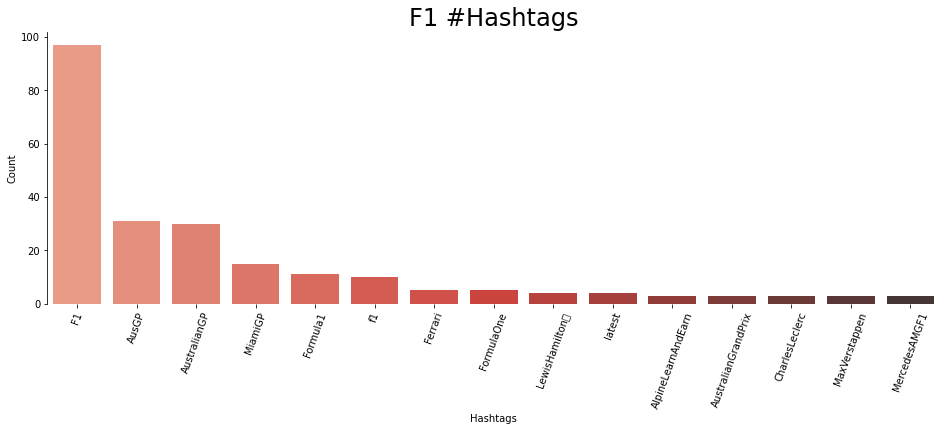

In [26]:
data = df_pivot.nlargest(columns="Tweet_Id", n = 15) 

# Creating bar graph
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data, x= "Hashtags", y = "Tweet_Id", palette=("Reds_d"))

# Altering the visual elements
sns.set_context("poster")
ax.set(ylabel = 'Count')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=70)

plt.title('F1 #Hashtags')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Output plot
plt.show()